<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab3_4/blob/master/deu_lab0_tensorflow1_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 1.x Lab

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

## Basic exercise

In [ ]:
a, b, c = 1., 2., 3.
a + b
np.array([1,2,3]) + np.array([4,5,6])

array([5, 7, 9])

In [ ]:
x0 = tf.constant(1.)
x1 = tf.constant([1., 2., 3., 4.])   # rank=1, dim=4
x2 = tf.constant([[1,2,1],           # rank=2
                  [3,4,2]], dtype='float32')
x3 = tf.constant([[[1,2],           # rank=3
                   [3,4]],

                  [[5,6],
                   [7,8]]], dtype='float32')
x0, x1, x2, x3

(<tf.Tensor 'Const_25:0' shape=() dtype=float32>,
 <tf.Tensor 'Const_26:0' shape=(4,) dtype=float32>,
 <tf.Tensor 'Const_27:0' shape=(2, 3) dtype=float32>,
 <tf.Tensor 'Const_28:0' shape=(2, 2, 2) dtype=float32>)

In [ ]:
x4 = tf.constant([1., 2., 3., 4.])
x5 = tf.constant([5., 6., 7., 8.])
result1 = tf.multiply(x4, x5)
result2 = x4 * x5
print(result1, result2)

Tensor("Mul_2:0", shape=(4,), dtype=float32) Tensor("mul_3:0", shape=(4,), dtype=float32)


In [ ]:
sess = tf.Session()
print(sess.run([result1, result2]))
sess.close()

[array([ 5., 12., 21., 32.], dtype=float32), array([ 5., 12., 21., 32.], dtype=float32)]


In [ ]:
with tf.Session() as sess:
    output1 = sess.run([result1, result2])
    output2 = [result1.eval(), result2.eval()]
output1, output2

([array([ 5., 12., 21., 32.], dtype=float32),
  array([ 5., 12., 21., 32.], dtype=float32)],
 [array([ 5., 12., 21., 32.], dtype=float32),
  array([ 5., 12., 21., 32.], dtype=float32)])

In [ ]:
# variables
v1 = tf.Variable('Hello')
v2 = tf.Variable(450)
v3 = tf.random.normal([2])
v3_2 = tf.random.normal((2,))

In [ ]:
v1, v2, v3, v3_2

(<tf.Variable 'Variable_8:0' shape=() dtype=string>,
 <tf.Variable 'Variable_9:0' shape=() dtype=int32>,
 <tf.Tensor 'random_normal_7:0' shape=(2,) dtype=float32>,
 <tf.Tensor 'random_normal_8:0' shape=(2,) dtype=float32>)

In [ ]:
data1 = tf.Variable([1,2])
data2 = tf.Variable([1., 2.])
data3 = tf.Variable([[False, True], [False, False]], dtype=bool)
data4 = tf.Variable([[1,2], [3,4], [5,6], [7,8]], tf.int32)

In [ ]:
data1, data2, data3, data4

(<tf.Variable 'Variable_10:0' shape=(2,) dtype=int32>,
 <tf.Variable 'Variable_11:0' shape=(2,) dtype=float32>,
 <tf.Variable 'Variable_12:0' shape=(2, 2) dtype=bool>,
 <tf.Variable 'Variable_13:0' shape=(4, 2) dtype=int32>)

In [ ]:
data4.shape

TensorShape([4, 2])

In [ ]:
r = tf.rank(data4)
with tf.Session() as sess:
    print(sess.run(r))


2


In [ ]:
t1 = tf.ones([3,4,5])
t2 = tf.reshape(t1, [2,3,5,2])
t1, t2

(<tf.Tensor 'ones_1:0' shape=(3, 4, 5) dtype=float32>,
 <tf.Tensor 'Reshape:0' shape=(2, 3, 5, 2) dtype=float32>)

In [ ]:
with tf.Session() as sess:
    print(sess.run([t1, t2]))

[array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]], dtype=float32), array([[[[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]],


       [[[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]]], dtype=float32)]


## linear regression using GD

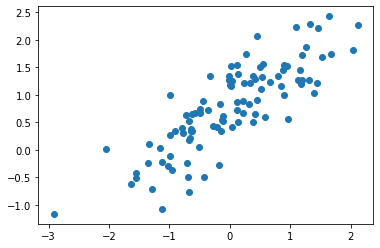

In [ ]:
n = 100
x = np.random.randn(n)
y = 0.7 * x + 0.7    # w = 0.7, b = 0.7
y = y + np.random.randn(n) * 0.5

plt.scatter(x,y)

### numpy

0.7193785206481322 0.7412906317980205


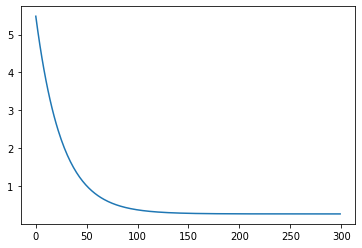

In [ ]:
w , b = np.random.randn(), np.random.randn()

lr = 0.02
n_epoch = 300
lossHistory = []

for i in range(n_epoch):
    y_pred = w * x + b
    error = ((y_pred - y)**2).mean()

    w = w - lr * ((y_pred - y)*x).mean()
    b = b - lr * (y_pred - y).mean()

    lossHistory.append(error)

print(w, b)
plt.plot(lossHistory)



### tensorflow 1.x

0.26257503 0.7454657 0.65191734


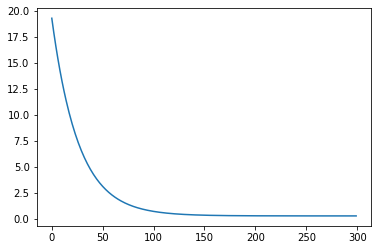

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

n = 100
x = np.random.randn(n)
y = 0.7 * x + 0.7    # w = 0.7, b = 0.7
y = y + np.random.randn(n) * 0.5

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(5.0)
b = tf.Variable(-1.0)

# Graph
y_pred = X * W + b       # hypothesis
cost = tf.reduce_mean(tf.square(y_pred - Y))

learning_rate = 0.02
W_grad = tf.reduce_mean((y_pred - Y) * X)
b_grad = tf.reduce_mean(y_pred - Y) 

W_desc = W - learning_rate * W_grad
b_desc = b - learning_rate * b_grad

W_update = W.assign(W_desc)
b_update = b.assign(b_desc)

lossHistory = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(300):
        sess.run([W_update, b_update], feed_dict = {X: x, Y: y})
        cost_val, W_val, b_val = sess.run([cost, W, b], feed_dict = {X: x, Y: y})
        lossHistory.append(cost_val)

print(cost_val, W_val, b_val)
plt.plot(lossHistory)



0.2816978 0.7309104 0.6664923


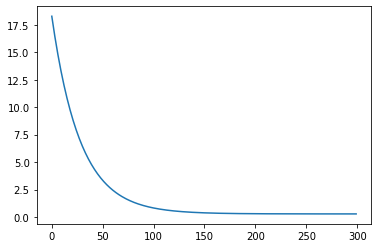

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

n = 100
x = np.random.randn(n)
y = 0.7 * x + 0.7    # w = 0.7, b = 0.7
y = y + np.random.randn(n) * 0.5

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(5.0)
b = tf.Variable(-1.0)

# Graph
y_pred = X * W + b       # hypothesis
cost = tf.reduce_mean(tf.square(y_pred - Y))

#############
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#############

lossHistory = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(300):
        sess.run(train, feed_dict = {X: x, Y: y})
        cost_val, W_val, b_val = sess.run([cost, W, b], feed_dict = {X: x, Y: y})
        lossHistory.append(cost_val)

print(cost_val, W_val, b_val)
plt.plot(lossHistory)

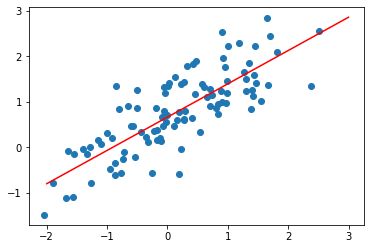

In [ ]:
plt.scatter(x, y)
xx = np.linspace(-2,3, 100)
yy = W_val * xx + b_val
plt.plot(xx, yy, c='r')